# Preamble

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import spinmob as s

Load in data and convert inches to cm:

In [2]:
datafilename = "calibration_data.csv"
calibration_data = s.data.load(datafilename)
added_voltage_error = 0.05
inch_to_cm = 2.54
calibration_data[0] *= inch_to_cm
calibration_data[2] *= inch_to_cm
calibration_data[3] += added_voltage_error

Convert to relative heights:

In [3]:
calibration_data[0] -= np.max(calibration_data[0])
calibration_data[0] *= -1
calibration_data[2] *= 2

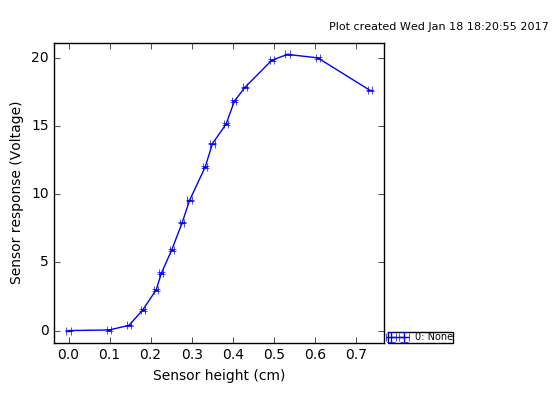

In [4]:
s.plot.xy.data(
    xdata=calibration_data[0], ydata=calibration_data[1],
    exdata=calibration_data[2], eydata=calibration_data[3],
    xlabel="Sensor height (cm)", ylabel="Sensor response (Voltage)")

Try to produce some linear fits:

In [27]:
np.load('results_of_linear_fits.npy')

array([[   0.        ,    3.        ,    8.17319947],
       [   0.        ,    4.        ,   84.972506  ],
       [   0.        ,    5.        ,  213.29925601],
       [   0.        ,    6.        ,  342.43881811],
       [   1.        ,    3.        ,   49.89941084],
       [   1.        ,    4.        ,   86.65313442],
       [   1.        ,    5.        ,  140.74483416],
       [   1.        ,    6.        ,  206.11239074],
       [   2.        ,    3.        ,    6.40666667],
       [   2.        ,    4.        ,   40.33434882],
       [   2.        ,    5.        ,   59.56277553],
       [   2.        ,    6.        ,   82.60954411],
       [   3.        ,    3.        ,   38.1990562 ],
       [   3.        ,    4.        ,   30.24325616],
       [   3.        ,    5.        ,   31.28060896],
       [   3.        ,    6.        ,   37.55625314],
       [   4.        ,    3.        ,   10.28571429],
       [   4.        ,    4.        ,    5.14830508],
       [   4.        ,    5.

In [26]:
def obtain_fit_results(calibration_data):
    fit_results = []
    for start in range(0, 8):
        for length in range(3, 7):
            my_fitter = s.data.fitter(f='a*x + b', p='a, b')
            length_of_regression = length
            start_of_regression = start
            end_of_regression = start_of_regression + length_of_regression
            my_fitter.set_data(
                xdata=calibration_data[0][start_of_regression:end_of_regression],
                ydata=calibration_data[1][start_of_regression:end_of_regression],
                exdata=calibration_data[2][start_of_regression:end_of_regression],
                eydata=calibration_data[3][start_of_regression:end_of_regression])
            my_fitter.fit()
            chi_squared = my_fitter.reduced_chi_squareds()[0]
            fit_results.append([start, length, chi_squared])
    return fit_results

In [19]:
fit_results = np.array(fit_results)
smallest_chi_square = np.argmin(fit_results[:, 2])
print("The best chi-squared is", 
      fit_results[smallest_chi_square, 2],
      "for position", fit_results[smallest_chi_square, :2])
start_position = fit_results[smallest_chi_square, 0]
length = fit_results[smallest_chi_square, 1]
print("This voltage is",
      calibration_data[1][start_position],
      "to",
      calibration_data[1][start_position+length])

The best chi-squared is 3.26794774224 for position [ 6.  3.]
This voltage is 5.92 to 11.98
3.0


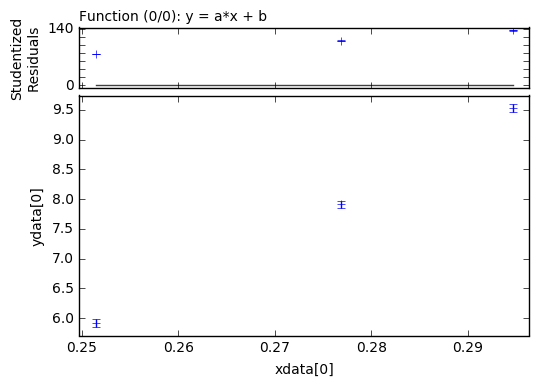

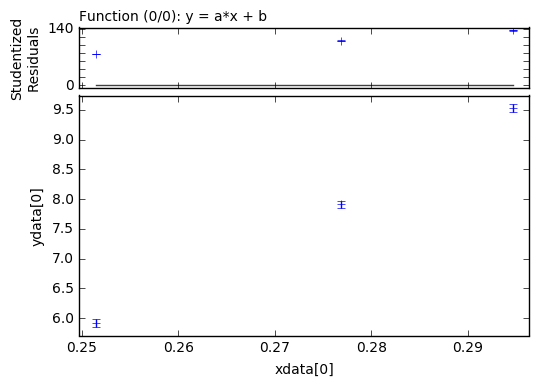

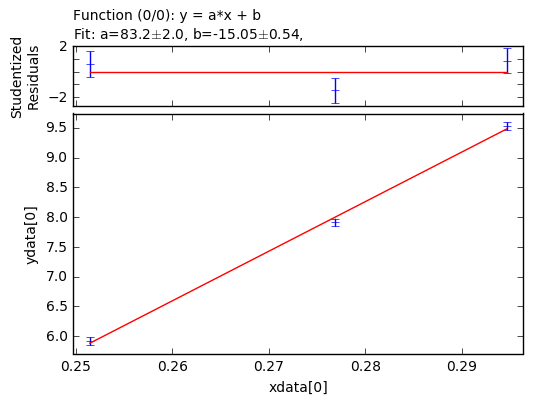


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [1000]
  plot_bg         [True]
  plot_ey         [True]
  plot_fit        [True]
  plot_guess      [True]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          [False]
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '+', 'color': 'b', 'ls': ''}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          [None]
  xmax            [0.29464000000000823]
  xmin            [0.25146000000000157]
  xscale          ['linear']
  ylabel          [None]
  ymax            [9.5299999999999994]
  ymin            [5.9199999999999999]
  yscale          ['linear']

CONSTANTS

GUESS (reduced chi squared = [ 37100.])
  a          = 1.0
  b          = 1.0

FIT RESULTS (reduced chi squared = [ 3.27])
  a          = 83.2 +/- 2.0
  b          = -15.05 +/- 

In [28]:
my_fitter = s.data.fitter(f='a*x + b', p='a, b')
length_of_regression = length
start_of_regression = start_position
end_of_regression = start_of_regression + length_of_regression
my_fitter.set_data(
    xdata=calibration_data[0][start_of_regression:end_of_regression],
    ydata=calibration_data[1][start_of_regression:end_of_regression],
    exdata=calibration_data[2][start_of_regression:end_of_regression],
    eydata=calibration_data[3][start_of_regression:end_of_regression])
my_fitter.fit()